### Data Conditioning
- Prepare distribution plots that show the mean and median for each feature.
- Discuss how we can assess skew from these plots.
- Standardize the data.
- Prepare distribution plots of the standardized data and discuss how the plots show the transformation that's been applied.
- Apply a log transformation to the original data, then standardize or standard scale it.
- Prepare distribution plots of the transformed data and discuss how the plots show the transformation that's been applied.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [2]:
housing_df = pd.read_csv('/home/jovyan/UCLA_CSX_450_2_2018_W/Project3_Housing/housing_data.csv',delim_whitespace=True, header=None)
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.drop(['MEDV'], axis=1, inplace=True)

In [3]:
housing_samp_df = housing_df.sample(5)

In [4]:
samp_stats = housing_samp_df.describe().T
samp_stats['skew'] = st.skew(housing_samp_df)
samp_stats['kurt'] = st.kurtosis(housing_samp_df)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,5.0,4.68228,6.125262,0.08829,0.13158,0.7258,9.39063,13.0751,0.538108,-1.540918
ZN,5.0,2.50000,5.590170,0.00000,0.00000,0.0000,0.00000,12.5000,1.500000,0.250000
INDUS,5.0,12.44400,5.228550,7.87000,8.14000,10.0100,18.10000,18.1000,0.336401,-1.802971
CHAS,5.0,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.0000,0.000000,-3.000000
NOX,5.0,0.58580,0.088630,0.52400,0.53800,0.5470,0.58000,0.7400,1.309879,-0.024863
RM,5.0,5.85100,0.232455,5.62700,5.71300,5.7270,6.01200,6.1760,0.505736,-1.400459
AGE,5.0,71.84000,13.686051,56.70000,66.60000,69.5000,72.50000,93.9000,0.775073,-0.415619
DIS,5.0,3.34560,1.422702,1.81720,2.73010,2.8237,3.79650,5.5605,0.680587,-0.728261
RAD,5.0,12.60000,10.430724,4.00000,5.00000,6.0000,24.00000,24.0000,0.394206,-1.825681
TAX,5.0,476.40000,180.222918,307.00000,311.00000,432.0000,666.00000,666.0000,0.198540,-1.767642


In [5]:
stats = housing_df.describe().T
stats['skew'] = st.skew(housing_df)
stats['kurt'] = st.kurtosis(housing_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063,3.979949
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799,9.531453
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
housing_sc = scaler.fit_transform(housing_df)
housing_sc_df = pd.DataFrame(housing_sc, columns=housing_df.columns)

sc_stats = housing_sc_df.describe().T
sc_stats['skew'] = st.skew(housing_sc_df)
sc_stats['kurt'] = st.kurtosis(housing_sc_df)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063,3.979949
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799,9.531453
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985


,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,-1.123388e-16,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931,5.207652,36.752786
ZN,506.0,7.898820e-17,1.00099,-0.487722,-0.487722,-0.487722,0.048772,3.804234,2.219063,3.979949
INDUS,506.0,2.106352e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565,0.294146,-1.233218
CHAS,506.0,-3.510587e-17,1.00099,-0.272599,-0.272599,-0.272599,-0.272599,3.668398,3.395799,9.531453
NOX,506.0,-1.965929e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346,0.727144,-0.075864
RM,506.0,-1.088282e-16,1.00099,-3.880249,-0.568630,-0.108466,0.482768,3.555044,0.402415,1.861027
AGE,506.0,-1.474446e-16,1.00099,-2.335437,-0.837448,0.317382,0.906798,1.117494,-0.597186,-0.970014
DIS,506.0,-8.425408e-17,1.00099,-1.267069,-0.805688,-0.279323,0.662371,3.960518,1.008779,0.471299
RAD,506.0,-1.123388e-16,1.00099,-0.982843,-0.637962,-0.523001,1.661245,1.661245,1.001833,-0.870521
TAX,506.0,0.000000e+00,1.00099,-1.313990,-0.767576,-0.464673,1.530926,1.798194,0.667968,-1.142985


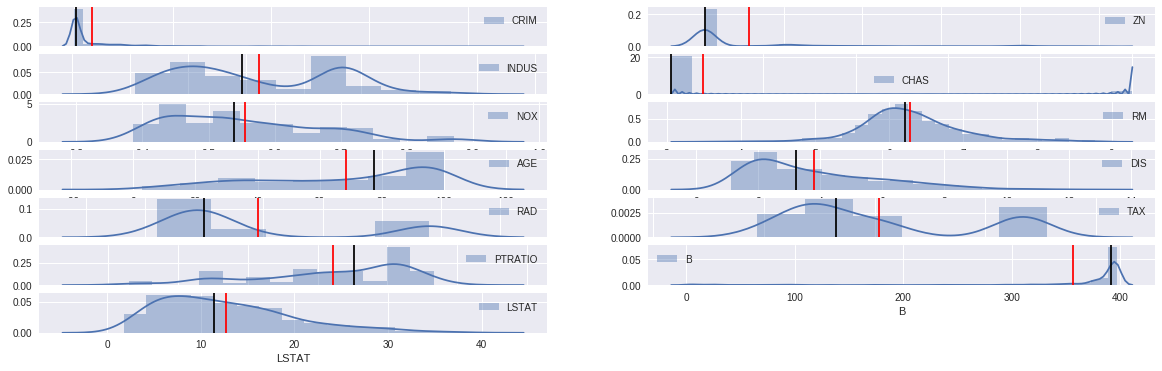

In [9]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(housing_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_df[col], label=col)
    plt.axvline(housing_df[col].mean(), c='red')
    plt.axvline(housing_df[col].median(), c='black')
    plt.legend()

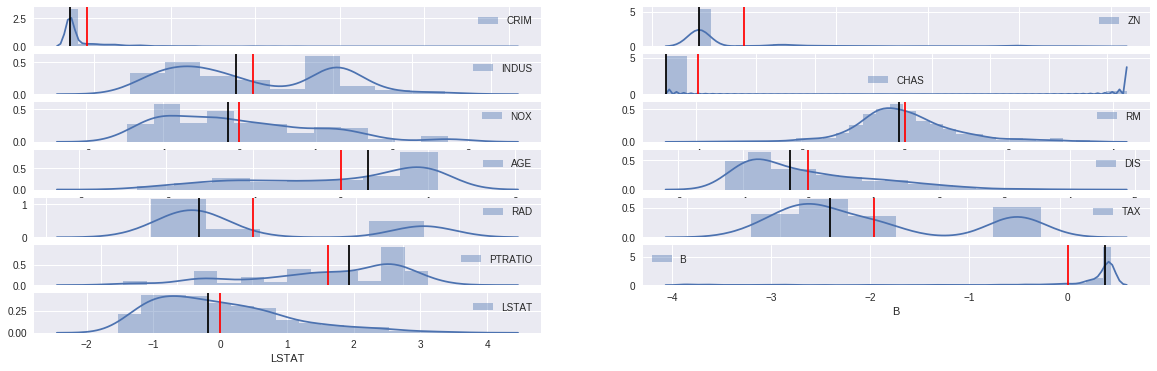

In [11]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_sc_df[col], label=col)
    plt.axvline(housing_sc_df[col].mean(), c='red')
    plt.axvline(housing_sc_df[col].median(), c='black')
    plt.legend()